<a href="https://colab.research.google.com/github/zhihong1224/RNN_demo/blob/master/Simple_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 Setup

In [0]:
import numpy as np
import os
import torch
from torch import nn,optim
import matplotlib.pyplot as plt
%matplotlib inline

device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# 2 数据

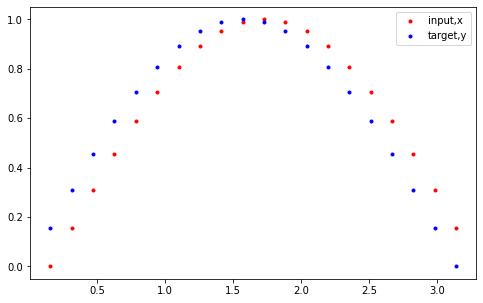

In [0]:
plt.figure(figsize=(8,5))
seq_length=20
time_steps=np.linspace(0,np.pi,seq_length+1)
data=np.sin(time_steps)
data.resize((seq_length+1,1))

x=data[:-1]
y=data[1:]

plt.plot(time_steps[1:],x,'r.',label='input,x')
plt.plot(time_steps[1:],y,'b.',label='target,y')

plt.legend()

# 3 模型定义

In [0]:
class RNN(nn.Module):
  def __init__(self,input_size,output_size,hidden_dim,n_layers):
    super(RNN,self).__init__()
    self.hidden_dim=hidden_dim
    self.rnn=nn.RNN(input_size,hidden_dim,n_layers,batch_first=True)
    self.fc=nn.Linear(hidden_dim,output_size)
  def forward(self,x,hidden):
    r_out,hidden=self.rnn(x,hidden)
    r_out=r_out.view(-1,self.hidden_dim)
    output=self.fc(r_out)
    return output,hidden

In [0]:
# 测试模型
test_rnn=RNN(1,1,10,2)
test_input=torch.tensor(data,dtype=torch.float32).unsqueeze(0)
test_out,test_h=test_rnn(test_input,None)
print('output size:',test_out.shape)
print('hidden state size:',test_h.shape)

output size: torch.Size([21, 1])
hidden state size: torch.Size([2, 1, 10])


# 4 训练模型

In [0]:
input_size=1
output_size=1
hidden_dim=32
n_layers=1
rnn=RNN(input_size,output_size,hidden_dim,n_layers)
print(rnn)

RNN(
  (rnn): RNN(1, 32, batch_first=True)
  (fc): Linear(in_features=32, out_features=1, bias=True)
)


In [0]:
def train(rnn,n_steps,print_every):
  criterion=nn.MSELoss()
  optimizer=optim.Adam(rnn.parameters(),lr=0.01)

  hidden=None

  for batch_i,step in enumerate(range(n_steps)):
    time_steps=np.linspace(step*np.pi,(step+1)*np.pi,seq_length+1)
    data=np.sin(time_steps)
    data.resize((seq_length+1,1))

    x=data[:-1]
    y=data[1:]

    x_tensor=torch.tensor(x,dtype=torch.float32).unsqueeze(0)
    y_tensor=torch.tensor(y,dtype=torch.float32)

    prediction,hidden=rnn(x_tensor,hidden)

    hidden=hidden.data

    loss=criterion(prediction,y_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if batch_i%print_every==0:
      print('loss:',loss.item())
      plt.plot(time_steps[1:],x,'r.')
      plt.plot(time_steps[1:],prediction.data.numpy().flatten(),'b.')
      plt.show()
  return rnn

loss: 0.004253261722624302


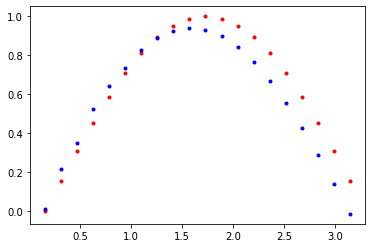

loss: 0.008081917650997639


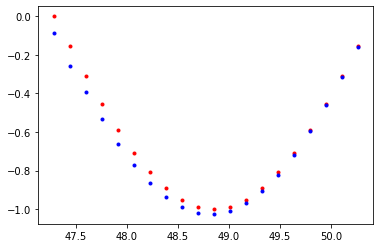

loss: 0.0020139124244451523


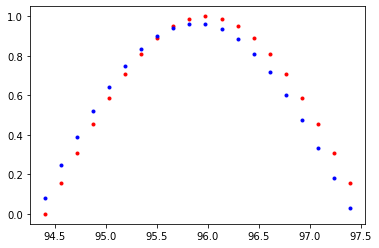

loss: 0.00026635508402250707


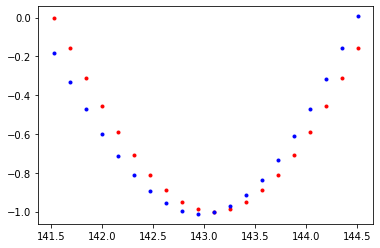

loss: 4.90423190058209e-05


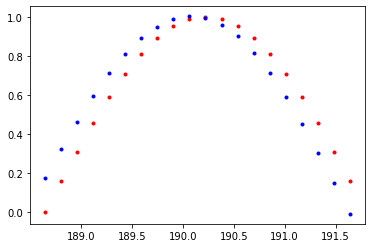

loss: 8.15051535028033e-05


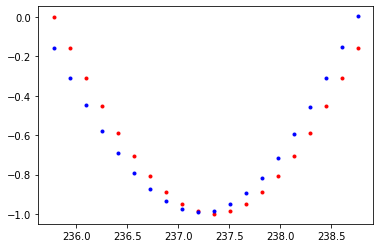

loss: 3.115496292593889e-05


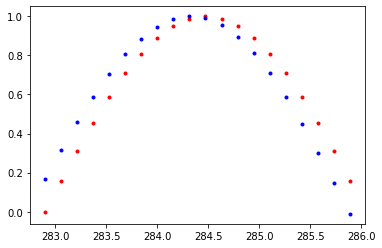

loss: 4.6392415242735296e-05


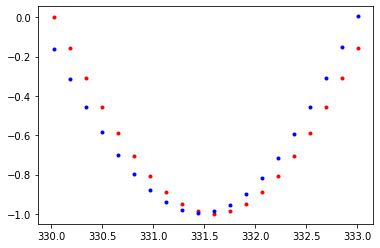

loss: 2.285292612214107e-05


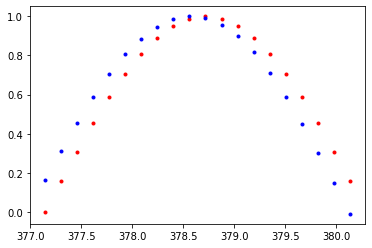

In [0]:
n_steps=125
print_every=15
trained_rnn=train(rnn,n_steps,print_every)

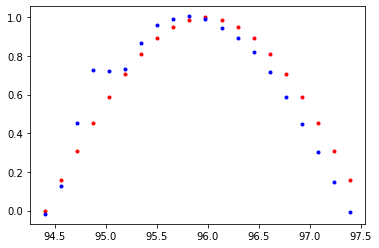

In [0]:
step=30
seq_length=20
time_steps=np.linspace(step*np.pi,(step+1)*np.pi,seq_length+1)
data=np.sin(time_steps)
data.resize((seq_length+1,1))

x=data[:-1]
y=data[1:]

x_tensor=torch.tensor(x,dtype=torch.float32).unsqueeze(0)
y_tensor=torch.tensor(y,dtype=torch.float32)
with torch.no_grad():
  prediction,hidden=rnn(x_tensor,None)

hidden=hidden.data

plt.plot(time_steps[1:],x,'r.')
plt.plot(time_steps[1:],prediction.data.numpy().flatten(),'b.')

> 为什么这里预测效果不好？ 未解决